In [1]:
import ase
import ase.io
from ase.io import xsf
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [2]:
with open('2d-structures/uuids3Dlayered.json') as f:
    uuids_3d_layered = json.load(f)

with open('2d-structures/allBE.json') as f:
    allBE = json.load(f)

In [3]:
'0e12d527-821d-4c68-a898-f96268cc1dbe' in uuids_3d_layered

False

In [4]:
allBE['0e12d527-821d-4c68-a898-f96268cc1dbe']

{'relevant_dimension_of_highest_dimensionality_substructure': 43.96341884868421,
 'binding_energy_per_substructure': -0.36854635160125326,
 'number_of_atoms_in_bulk': 8,
 'warnings': [],
 'substructure_dimensionalities': [2],
 'number_of_highest_dimensionality_substructures_in_bulk': 1,
 'number_of_types_in_bulk': 2,
 'relevant_dimension_units': 'ang^2',
 'substructures_uuids': ['dbe4dc90-f23a-4446-8703-8c2e1a90b3bb'],
 'structure_bulk_original': '2d031e1f-ef9b-4112-9216-de429085ed5f',
 'energy_units': 'eV',
 'energy_bulk': -22258.2442617783,
 'structure_bulk_relaxed': '691b636e-469e-4606-b519-270d7a76e04c',
 'energy_structure_sub_0': -22257.8757154267}

In [5]:
len(allBE)

1927

In [6]:
len(uuids_3d_layered)

3687

In [7]:
uuids = []
structure_bulk_original_withBE = []
structure_bulk_relaxed_withBE = []
binding_energy_per_substructures = []
relevant_dimension_of_highest_dimensionality_substructures = []
structures = []
binding_energies = []
labels = []
for key in allBE.keys():
    key_bulk = allBE[key]['structure_bulk_relaxed']
    structure_bulk_original_withBE.append(allBE[key]['structure_bulk_original'])
    structure_bulk_relaxed_withBE.append(allBE[key]['structure_bulk_relaxed'])
    
    path = '2d-structures/structure_bulk_relaxed/'
    folder = os.fsencode(path)
    
    filename = key_bulk + '.xsf'
    with open(path + filename) as f:
            structure = ase.io.xsf.read_xsf(f, index=- 1, read_data=False)
    
    relevant_dimension_of_highest_dimensionality_substructures.append(allBE[key]['relevant_dimension_of_highest_dimensionality_substructure'])
    binding_energy_per_substructures.append(allBE[key]['binding_energy_per_substructure'])
    tmp = ( -1000. *
            allBE[key]['binding_energy_per_substructure']/
            allBE[key]['relevant_dimension_of_highest_dimensionality_substructure'])
    binding_energies.append(tmp)
        
    if tmp <= 30:
            labels.append('EE')
    elif 30 < tmp <= 130:
            labels.append('PE')
    else:
            labels.append('HBE')
        
    uuids.append(key)
    structures.append(structure)  

    
data = {
    'uuid' : uuids,
    'structure' : structures,
    'binding_energy' : binding_energies,
    'label' : labels,
    'structure_bulk_original' : structure_bulk_original_withBE,
    'structure_bulk_relaxed' : structure_bulk_relaxed_withBE,
}

df_withBE = pd.DataFrame(data)

/home/mvahdat/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='label', ylabel='count'>

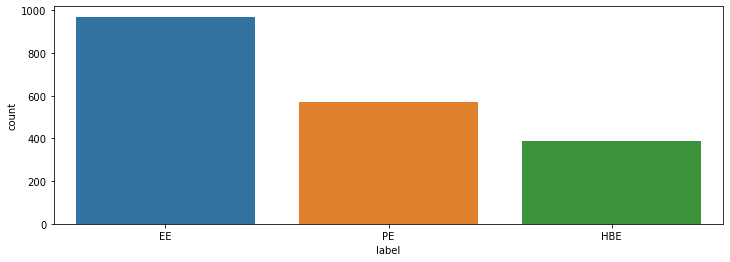

In [8]:
plt.figure(figsize = (12,4))
sns.countplot(df_withBE['label'])

In [9]:
from matminer.featurizers.conversions import ASEAtomstoStructure

In [10]:
aa2s = ASEAtomstoStructure()
df_withBE = aa2s.fit_featurize_dataframe(df_withBE, col_id= 'structure', ignore_errors=True)

ASEAtomstoStructure:   0%|          | 0/1927 [00:00<?, ?it/s]

In [11]:
df_withBE.head()

,uuid,structure,binding_energy,label,structure_bulk_original,structure_bulk_relaxed,PMG Structure from ASE Atoms
0,0e12d527-821d-4c68-a898-f96268cc1dbe,"(Atom('Gd', [0.0, -0.0, 3.1519154659], index=0...",8.383023,EE,2d031e1f-ef9b-4112-9216-de429085ed5f,691b636e-469e-4606-b519-270d7a76e04c,[[-1.30628722e-16 9.42477908e-18 3.15191547e...
1,c20274b1-40c7-40c5-987d-419d6158f907,"(Atom('Zn', [0.0, 0.0, 0.0], index=0), Atom('N...",65.110991,PE,eb884bed-4727-4a4e-8765-e04ee342c627,98b5f692-5bf0-4652-8dc3-a7898b129033,"[[0. 0. 0.] Zn, [1.88856784 1.88856784 2.59480..."
2,65d47958-ea9d-43ee-8f41-2b3537549f9a,"(Atom('Cu', [2.8325490718, 2.6994815479, -0.28...",10.568737,EE,c2f3b7e3-5db3-4e35-9bdd-51cbb2e6032d,7ce27686-0183-4dc5-a21d-03801f5bd4a3,"[[ 2.83254907 2.69948155 -0.28118957] Cu, [-2..."
3,9885b572-7a5f-4cec-937b-06cb83370541,"(Atom('C', [1.6525004586, 1.6525004586, 0.0], ...",22.127216,EE,af484afa-94d7-4f6d-8340-0acc71297d5c,86cd3b93-e4d3-44d2-974e-b0d657061bde,"[[1.65250046 1.65250046 0. ] C, [0. 0. ..."
4,19acc17e-ab39-4887-b7ab-e7576f5d61e3,"(Atom('H', [1.2283965146, 2.0489822606, 3.1660...",16.581488,EE,5b815108-0890-4377-88fa-e3b6ecaa76c8,6539f69a-9471-44f8-84e2-cbe6cac178ae,"[[1.22839651 2.04898226 3.1660159 ] H, [2.1638..."


In [12]:
df_withBE.to_pickle("DataFrame_NewBE-AfterRelax.pkl")

In [13]:
df_withBE = pd.read_pickle("DataFrame_NewBE-AfterRelax.pkl")

In [14]:
df_withBE['num_atoms'] = df_withBE['PMG Structure from ASE Atoms'].apply(lambda x: x.composition.num_atoms)

In [15]:
df_withBE['num_atoms'].value_counts()

6.0     151
8.0     137
12.0    129
24.0    115
4.0     106
28.0     98
10.0     90
36.0     88
16.0     78
20.0     76
40.0     74
32.0     69
34.0     55
38.0     54
26.0     54
14.0     53
18.0     52
5.0      50
30.0     45
3.0      42
22.0     39
15.0     33
7.0      32
13.0     31
9.0      31
11.0     18
39.0     16
27.0     15
33.0     14
19.0     11
17.0     11
23.0     10
21.0      9
2.0       8
25.0      8
31.0      6
35.0      6
37.0      6
29.0      5
1.0       2
Name: num_atoms, dtype: int64

In [16]:
structures = list(df_withBE["PMG Structure from ASE Atoms"])
gridpoints = list(df_withBE.index)

In [17]:
features = {n:{} for n in gridpoints}
for name in gridpoints:
    features[name]["structure"]=df_withBE["PMG Structure from ASE Atoms"][name]

In [18]:
data=pd.DataFrame.from_dict(features).T
data

,structure
0,[[-1.30628722e-16 9.42477908e-18 3.15191547e...
1,"[[0. 0. 0.] Zn, [1.88856784 1.88856784 2.59480..."
2,"[[ 2.83254907 2.69948155 -0.28118957] Cu, [-2..."
3,"[[1.65250046 1.65250046 0. ] C, [0. 0. ..."
4,"[[1.22839651 2.04898226 3.1660159 ] H, [2.1638..."
...,...
1922,[[3.50603948e-17 1.14850843e+01 3.74878872e+00...
1923,"[[0.1155218 3.55516846 0.12003483] Ni, [3.956..."
1924,"[[4.94447262 5.57299849 1.38528688] Tl, [-0.48..."
1925,[[-4.34596912e-17 5.06163305e+00 1.34587459e...


In [19]:
data = data.reset_index()


In [20]:
%matplotlib inline
from matplotlib import pyplot as plt
from matminer.datasets import load_dataset
from matminer.featurizers.base import MultipleFeaturizer
from matminer.featurizers.composition import ElementProperty, Stoichiometry, ValenceOrbital, IonProperty
from matminer.featurizers.structure import (SiteStatsFingerprint, StructuralHeterogeneity,
                                            ChemicalOrdering, StructureComposition, MaximumPackingEfficiency)
from matminer.featurizers.conversions import DictToObject
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import ShuffleSplit, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from scipy import stats
from tqdm import tqdm_notebook as tqdm
import numpy as np

In [21]:
featurizer = MultipleFeaturizer([
    SiteStatsFingerprint.from_preset("CoordinationNumber_ward-prb-2017"),
    StructuralHeterogeneity(),
    ChemicalOrdering(),
    MaximumPackingEfficiency(),
    SiteStatsFingerprint.from_preset("LocalPropertyDifference_ward-prb-2017"),
    StructureComposition(Stoichiometry()),
    StructureComposition(ElementProperty.from_preset("magpie")),
    StructureComposition(ValenceOrbital(props=['frac'])),
    StructureComposition(IonProperty(fast=True))
])

In [22]:
dto = DictToObject(target_col_id='structure', overwrite_data=True)
data = dto.featurize_dataframe(data, 'structure')

DictToObject:   0%|          | 0/1927 [00:00<?, ?it/s]

In [23]:
%%time
X = featurizer.featurize_many(data['structure'], ignore_errors=True)

MultipleFeaturizer:   0%|          | 0/1927 [00:00<?, ?it/s]

CPU times: user 1.19 s, sys: 246 ms, total: 1.43 s
Wall time: 5min 51s


In [30]:
import pandas as pd
failed = np.any(pd.isnull(X), axis=1)
print('Number failed: {}/{}'.format(np.sum(failed), len(failed)))

Number failed: 1225/1927


In [24]:
df_features = pd.DataFrame(X)
df_features.head()

,0,1,2,3,4,5,6,7,8,9,...,263,264,265,266,267,268,269,270,271,272
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,96.500000,48.750000,64.0,0.131148,0.245902,0.508197,0.114754,True,0.539020,0.101066
1,5.986080,9.860516,3.874436,8.944054,0.845135,0.04835,1.053113,0.846426,0.183146,0.228251,...,91.714286,87.673469,15.0,0.280000,0.520000,0.200000,0.000000,False,0.742626,0.108618
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,91.000000,94.800000,12.0,0.272727,0.424242,0.303030,0.000000,True,0.447278,0.079241
3,4.746512,7.092767,2.346255,6.310682,1.042780,0.12180,1.091350,0.817299,0.089195,0.347844,...,194.000000,0.000000,194.0,0.428571,0.571429,0.000000,0.000000,False,0.058259,0.012946
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,122.000000,92.666667,12.0,0.127907,0.197674,0.348837,0.325581,True,0.319141,0.058182


In [25]:
df_features = pd.concat([data, df_withBE['label'], df_withBE['binding_energy'], df_features], axis = 1, ignore_index= False)
df_features.head()

,index,structure,label,binding_energy,0,1,2,3,4,5,...,263,264,265,266,267,268,269,270,271,272
0,0,[[-1.30628722e-16 9.42477908e-18 3.15191547e...,EE,8.383023,NaN,NaN,NaN,NaN,NaN,NaN,...,96.500000,48.750000,64.0,0.131148,0.245902,0.508197,0.114754,True,0.539020,0.101066
1,1,"[[0. 0. 0.] Zn, [1.88856784 1.88856784 2.59480...",PE,65.110991,5.986080,9.860516,3.874436,8.944054,0.845135,0.04835,...,91.714286,87.673469,15.0,0.280000,0.520000,0.200000,0.000000,False,0.742626,0.108618
2,2,"[[ 2.83254907 2.69948155 -0.28118957] Cu, [-2...",EE,10.568737,NaN,NaN,NaN,NaN,NaN,NaN,...,91.000000,94.800000,12.0,0.272727,0.424242,0.303030,0.000000,True,0.447278,0.079241
3,3,"[[1.65250046 1.65250046 0. ] C, [0. 0. ...",EE,22.127216,4.746512,7.092767,2.346255,6.310682,1.042780,0.12180,...,194.000000,0.000000,194.0,0.428571,0.571429,0.000000,0.000000,False,0.058259,0.012946
4,4,"[[1.22839651 2.04898226 3.1660159 ] H, [2.1638...",EE,16.581488,NaN,NaN,NaN,NaN,NaN,NaN,...,122.000000,92.666667,12.0,0.127907,0.197674,0.348837,0.325581,True,0.319141,0.058182


In [26]:
df_features.to_pickle('features_MultipleFeaturizer_NewBE-AfterRelax.pkl')

In [27]:
df_features = pd.read_pickle('features_MultipleFeaturizer_NewBE-AfterRelax.pkl')

In [28]:
len(df_features)

1927

In [29]:
len(df_features.dropna())

702